# DAILY CHALLENGE

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [46]:
surv_dict={1:'survived',0:'died'}
df['surv']=df['Survived'].map(lambda x: surv_dict[x])

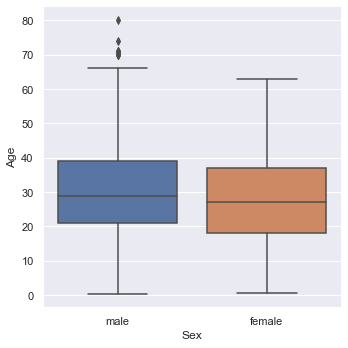

In [47]:
sns.catplot( "Sex", "Age", data=df, kind="box")
sns.set()
plt.show()

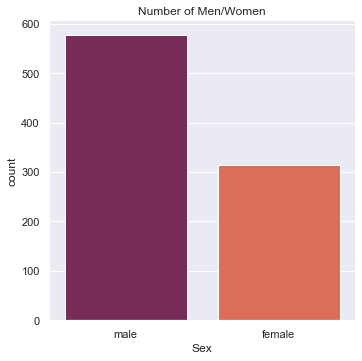

In [56]:
sns.catplot("Sex",kind="count",data=df,palette='rocket')
plt.title('Number of Men/Women')
plt.show()

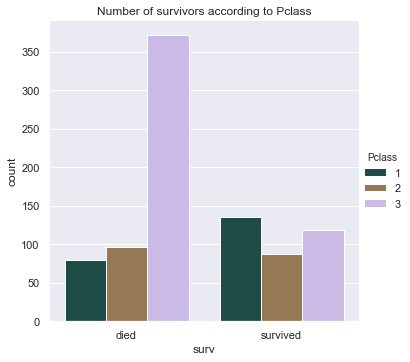

In [52]:
sns.catplot("surv",kind="count",hue="Pclass",data=df,palette='cubehelix')
plt.title('Number of survivors according to Pclass')
plt.show()

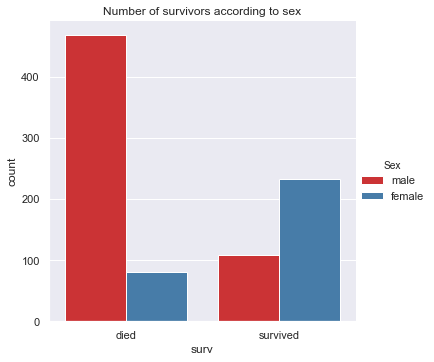

In [53]:
sns.catplot("surv",kind="count",hue="Sex",data=df,palette='Set1')
plt.title('Number of survivors according to sex')
plt.show()

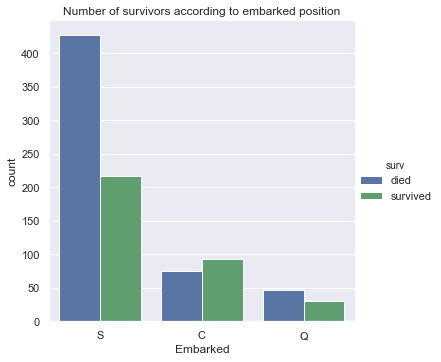

In [55]:
sns.catplot("Embarked",kind="count",hue="surv",data=df,palette=['b','g','m'])
plt.title('Number of survivors according to embarked position')
plt.show()

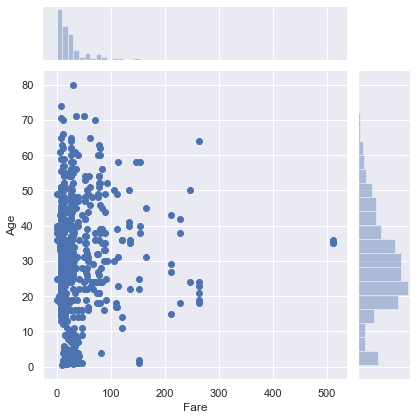

In [58]:
sns.jointplot("Fare", "Age", df)

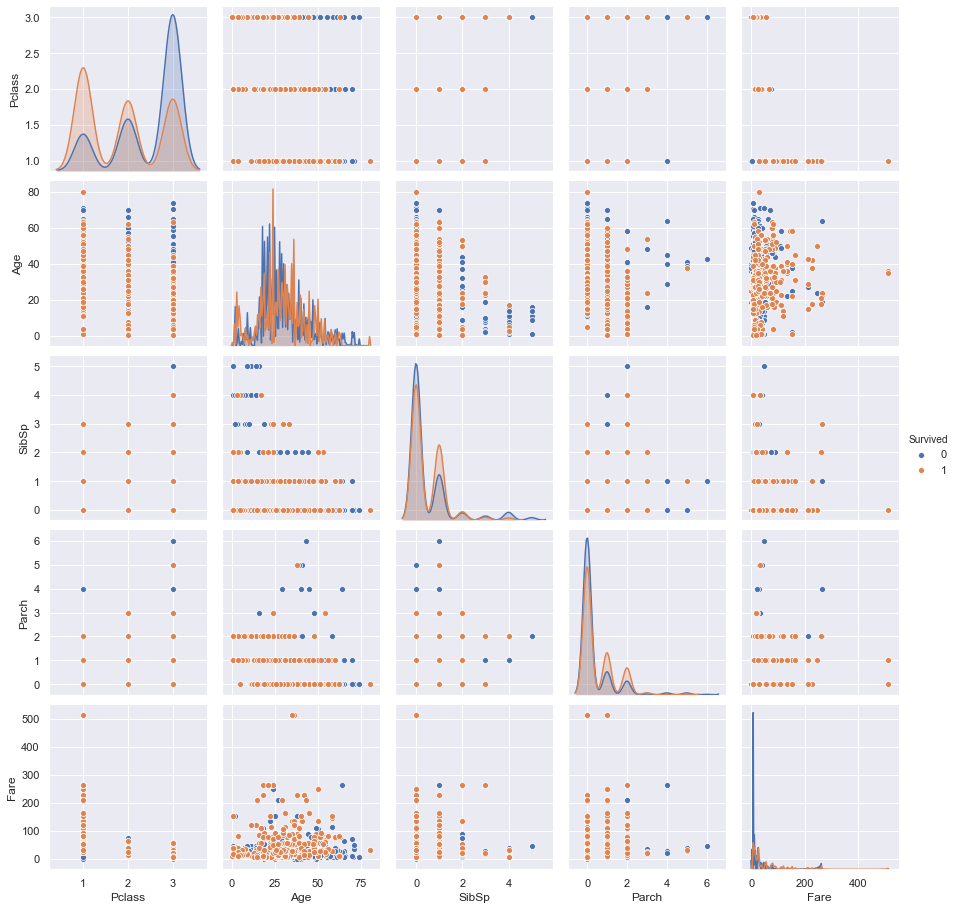

In [66]:
df.dropna(subset = ["Age"], inplace=True)
sns.pairplot(data=df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived', dropna=True, diag_kws={'bw': 0.2})

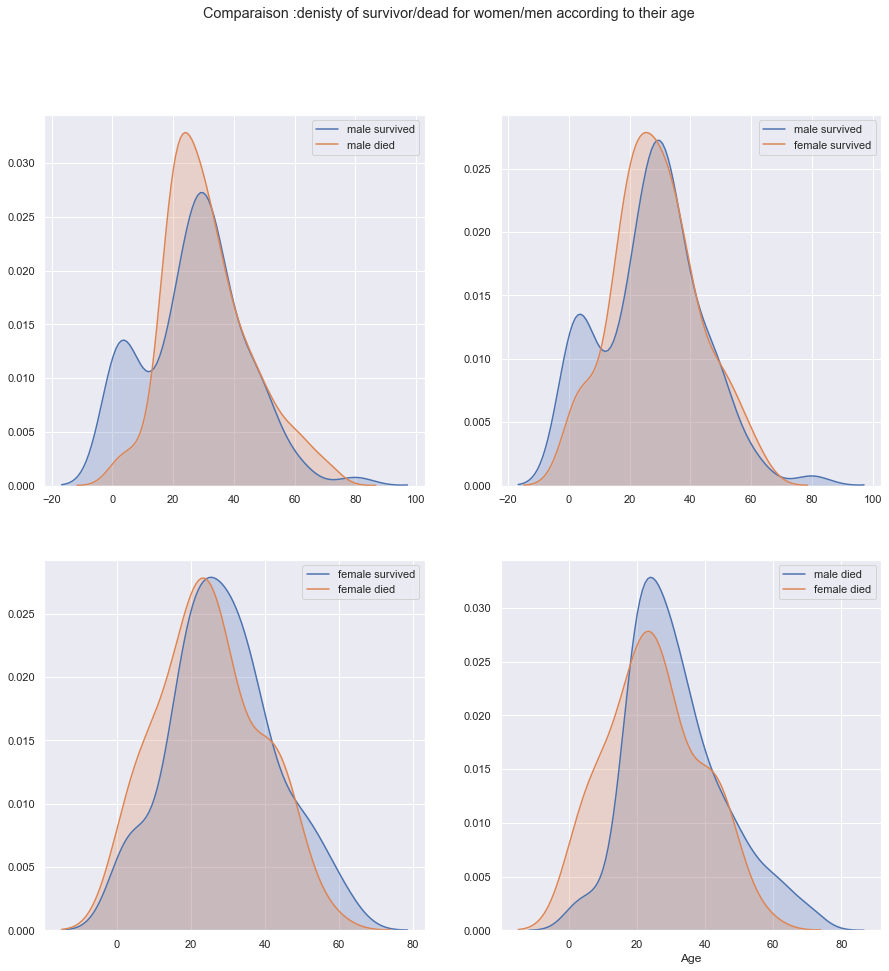

In [95]:
male_surv = df[(df['Sex']=='male')&(df['Survived']==1)]['Age']
male_died = df[(df['Sex']=='male')&(df['Survived']==0)]['Age']

female_surv = df[(df['Sex']=='female')&(df['Survived']==1)]['Age']
female_died = df[(df['Sex']=='female')&(df['Survived']==0)]['Age']

fig,ax = plt.subplots(2,2, figsize=(15,15))

fig.suptitle('Comparaison :denisty of survivor/dead for women/men according to their age')
sns.kdeplot(ax=ax[0,0], data=male_surv, shade=True, label='male survived')
sns.kdeplot(ax=ax[0,0], data=male_died, shade=True, label='male died')


sns.kdeplot(ax=ax[0,1], data=male_surv, shade=True, label='male survived')
sns.kdeplot(ax=ax[0,1], data=female_surv, shade=True, label='female survived')

sns.kdeplot(ax=ax[1,0], data=female_surv, shade=True, label='female survived')
sns.kdeplot(ax=ax[1,0], data=female_died, shade=True, label='female died')

sns.kdeplot(ax=ax[1,1], data=male_died, shade=True, label='male died')
sns.kdeplot(ax=ax[1,1], data=female_died, shade=True, label='female died')

plt.xlabel('Age')
plt.show()